# Python <-> Julia  Bridge

In [1]:
%load_ext julia.magic 
julia_version = %julia VERSION
julia_version

Initializing Julia interpreter. This may take some time...


<PyCall.jlwrap 0.5.2>

In [2]:
%%julia
@pyimport matplotlib.pyplot as plt
@pyimport numpy as np

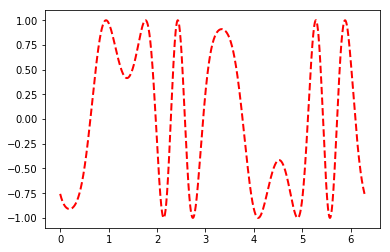

In [3]:
%%julia
                                        # Note how we mix numpy and julia:
t = linspace(0, 2*pi,1000);             # use the julia `linspace` and `pi`
s = sin(3*t + 4*np.cos(2*t));           # use the numpy cosine and julia sine
fig = plt.gcf()                         # **** WATCH THIS VARIABLE ****
plt.plot(t, s, color="red", linewidth=2.0, linestyle="--", label="sin(3t+4.cos(2t))")

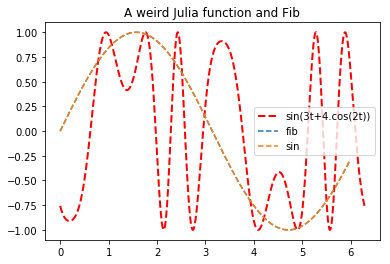

In [5]:
import numpy as np
fig = %julia fig
x = np.arange(0, 6, 0.01)
fig.axes[0].plot(x, np.sin(x), '--', label='sin')
fig.axes[0].set_title('A weird Julia function and Fib')
fig.axes[0].legend()

fig

In [6]:
from __future__ import print_function


# julia fib function
jlfib = %julia _fib(n, pyfib) = n <= 2 ? 1 : pyfib(n-1, _fib) + pyfib(n-2, _fib)


def pyfib(n, _fib):
    """
    Python fib function
    """
    #print('(P', end='')
    if n <= 2:
         r = 1
    else:
        #print('(J', end='')
        # here we tell julia (_fib) to recurse using Python
        r =  _fib(n-1, pyfib) + _fib(n-2, pyfib)
        #print(')',end='')
    #print(')',end='')
    return r

fibonacci = lambda x: pyfib(x, jlfib)

fibonacci(10)

55